<aside>
💡 **Question 1**

A permutation perm of n + 1 integers of all the integers in the range [0, n] can be represented as a string s of length n where:

- s[i] == 'I' if perm[i] < perm[i + 1], and
- s[i] == 'D' if perm[i] > perm[i + 1].

Given a string s, reconstruct the permutation perm and return it. If there are multiple valid permutations perm, return **any of them**.

**Example 1:**

**Input:** s = "IDID"

**Output:**

[0,4,1,3,2]

</aside>

**Ans:-**
To reconstruct the permutation `perm` from the given string `s`, we can follow the following steps:

1. Initialize an empty list `perm` to store the reconstructed permutation.
2. Initialize two variables, `min_num` and `max_num`, to keep track of the minimum and maximum numbers available for selection. Set `min_num` to 0 and `max_num` to the value of `n`.
3. Iterate over each character `ch` in the string `s`.
     - If `ch` is 'I':
       - Append `min_num` to `perm`.
       - Increment `min_num` by 1.
     - If `ch` is 'D':
       - Append `max_num` to `perm`.
       - Decrement `max_num` by 1.
4. After the iteration, both `min_num` and `max_num` will be equal, representing the last remaining number to be added to `perm`.
5. Append `min_num` to `perm`.
6. Return the reconstructed permutation `perm`.

In [1]:
def reconstruct_permutation(s):
    n = len(s)
    perm = []
    min_num, max_num = 0, n

    for ch in s:
        if ch == 'I':
            perm.append(min_num)
            min_num += 1
        elif ch == 'D':
            perm.append(max_num)
            max_num -= 1

    # Add the last remaining number
    perm.append(min_num)

    return perm


In [2]:
s = "IDID"
reconstructed_perm = reconstruct_permutation(s)
print(reconstructed_perm)


[0, 4, 1, 3, 2]


<aside>
💡 **Question 2**

You are given an m x n integer matrix matrix with the following two properties:

- Each row is sorted in non-decreasing order.
- The first integer of each row is greater than the last integer of the previous row.

Given an integer target, return true *if* target *is in* matrix *or* false *otherwise*.

You must write a solution in O(log(m * n)) time complexity.

**Example 1:**
**Input:** matrix = [[1,3,5,7],[10,11,16,20],[23,30,34,60]], target = 3

**Output:** true
</aside>

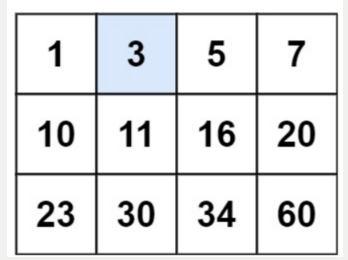

**Ans:-**
To solve this problem in O(log(m * n)) time complexity, we can use a modified form of binary search.

Here's the step-by-step algorithm:

1. Initialize two variables, `rows` and `cols`, to store the number of rows and columns in the matrix, respectively. Set `rows` to the length of the matrix, and if `rows` is greater than 0, set `cols` to the length of the first row of the matrix. Otherwise, return `False` since the matrix is empty.

2. Set `left` to 0 and `right` to `rows * cols - 1` as the search space boundaries.

3. Perform a binary search on the flattened matrix. While `left` is less than or equal to `right`, do the following:
   - Calculate the middle index as `mid = (left + right) // 2`.
   - Convert the middle index to row and column indices using `row = mid // cols` and `col = mid % cols`.
   - Compare the element at the middle index `matrix[row][col]` with the target:
     - If `matrix[row][col]` is equal to the target, return `True`.
     - If `matrix[row][col]` is less than the target, update `left = mid + 1`.
     - If `matrix[row][col]` is greater than the target, update `right = mid - 1`.

4. If the target is not found during the binary search, return `False`.

In [3]:
def searchMatrix(matrix, target):
    rows = len(matrix)
    if rows == 0:
        return False
    cols = len(matrix[0])

    left, right = 0, rows * cols - 1

    while left <= right:
        mid = (left + right) // 2
        row = mid // cols
        col = mid % cols
        if matrix[row][col] == target:
            return True
        elif matrix[row][col] < target:
            left = mid + 1
        else:
            right = mid - 1

    return False


In [4]:
matrix = [[1, 3, 5, 7], [10, 11, 16, 20], [23, 30, 34, 60]]
target = 3

result = searchMatrix(matrix, target)
print(result)


True


<aside>
💡 **Question 3**

Given an array of integers arr, return *true if and only if it is a valid mountain array*.

Recall that arr is a mountain array if and only if:

- arr.length >= 3
- There exists some i with 0 < i < arr.length - 1 such that:
    - arr[0] < arr[1] < ... < arr[i - 1] < arr[i]
    - arr[i] > arr[i + 1] > ... > arr[arr.length - 1]

**Example 1:**

**Input:** arr = [2,1]

**Output:**

false    
</aside>

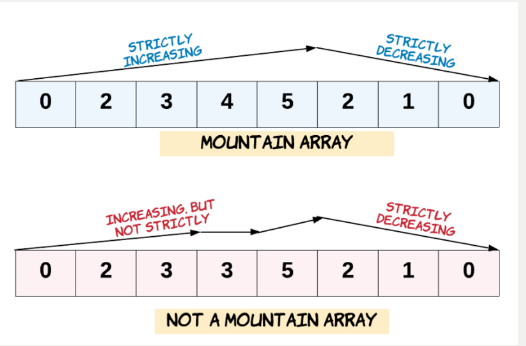

**Ans:-**
To determine if an array `arr` is a valid mountain array, we can follow these steps:

1. Check if the length of `arr` is less than 3. If it is, return `False` since a mountain array must have at least 3 elements.

2. Initialize two variables, `i` and `n`, to keep track of the current index and the length of `arr` respectively. Start `i` at 0.

3. While `i` is less than `n - 1` and `arr[i] < arr[i + 1]`, increment `i`. This step checks for the increasing part of the mountain array.

4. If `i` is equal to 0 or `i` is equal to `n - 1`, return `False` since the mountain array must have a peak.

5. While `i` is less than `n - 1` and `arr[i] > arr[i + 1]`, increment `i`. This step checks for the decreasing part of the mountain array.

6. If `i` is equal to `n - 1`, return `True` since we have reached the end of the array and all elements satisfy the conditions of a mountain array.

7. Otherwise, return `False` since there should be no elements after the decreasing part in a mountain array.

In [5]:
def validMountainArray(arr):
    n = len(arr)

    if n < 3:
        return False

    i = 0

    while i < n - 1 and arr[i] < arr[i + 1]:
        i += 1

    if i == 0 or i == n - 1:
        return False

    while i < n - 1 and arr[i] > arr[i + 1]:
        i += 1

    return i == n - 1

In [6]:
arr = [2, 1]
result = validMountainArray(arr)
print(result)

False


In [7]:
arr = [1,5,90,50]
result = validMountainArray(arr)
print(result)


True


<aside>
💡 **Question 4**

Given a binary array nums, return *the maximum length of a contiguous subarray with an equal number of* 0 *and* 1.

**Example 1:**

**Input:** nums = [0,1]

**Output:** 2

**Explanation:**

[0, 1] is the longest contiguous subarray with an equal number of 0 and 1.

</aside>

**Ans:-**
To find the maximum length of a contiguous subarray with an equal number of 0s and 1s in a binary array `nums`, we can use the following approach:

1. Initialize a variable `max_length` to store the maximum length found so far and set it to 0.
2. Initialize a variable `count` to store the running count of 0s and 1s. Set it to 0.
3. Create an empty dictionary `count_map` to store the count of `count` at each index encountered. The key will be the `count` value, and the value will be the index.
4. Iterate over the array `nums` from left to right and perform the following steps:
   - Increment `count` by 1 if the current element is 1 or decrement it by 1 if the current element is 0.
   - If `count` is 0, it means that the subarray from index 0 to the current index has an equal number of 0s and 1s. Update `max_length` to the current index + 1 since the subarray is valid up to this point.
   - If `count` is already present in `count_map`, it means that the subarray between the previous occurrence of `count` (exclusive) and the current index (inclusive) has an equal number of 0s and 1s. Calculate the length of this subarray as `index - count_map[count]` and update `max_length` if it's greater.
   - If `count` is not present in `count_map`, add it to `count_map` along with its index.
5. Return `max_length` as the maximum length of a contiguous subarray with an equal number of 0s and 1s.


In [8]:
def findMaxLength(nums):
    max_length = 0
    count = 0
    count_map = {0: -1}

    for index, num in enumerate(nums):
        count += 1 if num == 1 else -1

        if count == 0:
            max_length = index + 1
        elif count in count_map:
            subarray_length = index - count_map[count]
            max_length = max(max_length, subarray_length)
        else:
            count_map[count] = index

    return max_length


In [9]:
nums = [0, 1]
result = findMaxLength(nums)
print(result)


2


In [13]:
nums = [0,1,0,1,20]
result = findMaxLength(nums)
print(result)


4


<aside>
💡 **Question 5**

The **product sum** of two equal-length arrays a and b is equal to the sum of a[i] * b[i] for all 0 <= i < a.length (**0-indexed**).

- For example, if a = [1,2,3,4] and b = [5,2,3,1], the **product sum** would be 1*5 + 2*2 + 3*3 + 4*1 = 22.

Given two arrays nums1 and nums2 of length n, return *the **minimum product sum** if you are allowed to **rearrange** the **order** of the elements in* nums1.

**Example 1:**

**Input:** nums1 = [5,3,4,2], nums2 = [4,2,2,5]

**Output:** 40

**Explanation:**

We can rearrange nums1 to become [3,5,4,2]. The product sum of [3,5,4,2] and [4,2,2,5] is 3*4 + 5*2 + 4*2 + 2*5 = 40.

</aside>

**Ans:-**
To find the minimum product sum by rearranging the order of elements in `nums1` and multiplying them with the corresponding elements in `nums2`, we can follow these steps:

1. Sort `nums1` in non-decreasing order.
2. Sort `nums2` in non-increasing order.
3. Initialize a variable `min_product_sum` to store the minimum product sum and set it to 0.
4. Iterate over the elements `num1` and `num2` in `nums1` and `nums2`, respectively, and calculate the product `product = num1 * num2`.
5. Add the `product` to `min_product_sum`.
6. Return `min_product_sum` as the minimum product sum.

In [14]:
def minProductSum(nums1, nums2):
    nums1.sort()
    nums2.sort(reverse=True)

    min_product_sum = 0

    for num1, num2 in zip(nums1, nums2):
        product = num1 * num2
        min_product_sum += product

    return min_product_sum


In [15]:
nums1 = [5, 3, 4, 2]
nums2 = [4, 2, 2, 5]

result = minProductSum(nums1, nums2)
print(result)


40


<aside>
💡 **Question 6**

An integer array original is transformed into a **doubled** array changed by appending **twice the value** of every element in original, and then randomly **shuffling** the resulting array.

Given an array changed, return original *if* changed *is a **doubled** array. If* changed *is not a **doubled** array, return an empty array. The elements in* original *may be returned in **any** order*.

**Example 1:**

**Input:** changed = [1,3,4,2,6,8]

**Output:** [1,3,4]

**Explanation:** One possible original array could be [1,3,4]:

- Twice the value of 1 is 1 * 2 = 2.
- Twice the value of 3 is 3 * 2 = 6.
- Twice the value of 4 is 4 * 2 = 8.

Other original arrays could be [4,3,1] or [3,1,4].

</aside>

**Ans:-**
To determine the original array `original` given the transformed array `changed`, we can follow these steps:

1. Initialize an empty dictionary `count_map` to store the count of each element in `changed`.
2. Iterate over each element `num` in `changed` and do the following:
   - If `count_map` contains the key `num/2` and its count is greater than 0, decrement the count of `num/2` in `count_map` by 1.
   - Otherwise, if `count_map` contains the key `num` and its count is greater than 0, decrement the count of `num` in `count_map` by 1.
   - If neither condition is met, `changed` is not a valid doubled array, so return an empty array `[]`.
3. Initialize an empty list `original` to store the original array elements.
4. Iterate over each key `num` in `count_map` and do the following:
   - Append `num` to `original` `count_map[num]` number of times.
5. Return `original` as the original array.

In [21]:
from collections import Counter

def findOriginalArray(changed):
    if len(changed) % 2 != 0:
        return []

    count_map = Counter(changed)

    original = []

    for num in changed:
        if count_map[num] > 0 and count_map[2 * num] > 0:
            count_map[num] -= 1
            count_map[2 * num] -= 1
            original.append(num)
        elif count_map[num] == 0:
            continue
        else:
            return []

    return original


In [22]:
changed = [1, 3, 4, 2, 6, 8]
result = findOriginalArray(changed)
print(result)


[1, 3, 4]


<aside>
💡 **Question 7**

Given a positive integer n, generate an n x n matrix filled with elements from 1 to n2 in spiral order.

**Example 1:**
**Input:** n = 3

**Output:** [[1,2,3],[8,9,4],[7,6,5]]
</aside>

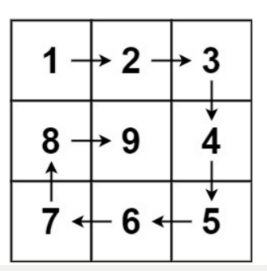

**Ans:-**
To generate an n x n matrix filled with elements in spiral order, we can use the following approach:

1. Initialize an empty matrix of size n x n, filled with zeros.
2. Initialize variables `row_start`, `row_end`, `col_start`, and `col_end` to keep track of the boundaries of the current spiral loop. Set them to 0, n-1, 0, and n-1 respectively.
3. Initialize a variable `num` to keep track of the current number to be filled in the matrix. Set it to 1.
4. Use a while loop to iterate while `num` is less than or equal to n^2 and `row_start` is less than or equal to `row_end` and `col_start` is less than or equal to `col_end`.
5. Within the loop, iterate from `col_start` to `col_end` and fill the elements in the top row of the current spiral loop. Increment `num` after each element is filled.
6. Increment `row_start` to move to the next row.
7. Within the loop, iterate from `row_start` to `row_end` and fill the elements in the right column of the current spiral loop. Increment `num` after each element is filled.
8. Decrement `col_end` to move to the previous column.
9. Within the loop, iterate from `col_end` to `col_start` in reverse order and fill the elements in the bottom row of the current spiral loop. Increment `num` after each element is filled.
10. Decrement `row_end` to move to the previous row.
11. Within the loop, iterate from `row_end` to `row_start` in reverse order and fill the elements in the left column of the current spiral loop. Increment `num` after each element is filled.
12. Increment `col_start` to move to the next column.
13. After the while loop ends, return the filled matrix.

In [23]:
def generateMatrix(n):
    matrix = [[0] * n for _ in range(n)]
    row_start, row_end = 0, n - 1
    col_start, col_end = 0, n - 1
    num = 1

    while num <= n * n and row_start <= row_end and col_start <= col_end:
        for col in range(col_start, col_end + 1):
            matrix[row_start][col] = num
            num += 1
        row_start += 1

        for row in range(row_start, row_end + 1):
            matrix[row][col_end] = num
            num += 1
        col_end -= 1

        for col in range(col_end, col_start - 1, -1):
            matrix[row_end][col] = num
            num += 1
        row_end -= 1

        for row in range(row_end, row_start - 1, -1):
            matrix[row][col_start] = num
            num += 1
        col_start += 1

    return matrix


In [24]:
n = 3
result = generateMatrix(n)
print(result)


[[1, 2, 3], [8, 9, 4], [7, 6, 5]]


<aside>
💡 **Question 8**

Given two [sparse matrices](https://en.wikipedia.org/wiki/Sparse_matrix) mat1 of size m x k and mat2 of size k x n, return the result of mat1 x mat2. You may assume that multiplication is always possible.

**Example 1:**
**Input:** mat1 = [[1,0,0],[-1,0,3]], mat2 = [[7,0,0],[0,0,0],[0,0,1]]

**Output:**

[[7,0,0],[-7,0,3]]
</aside>

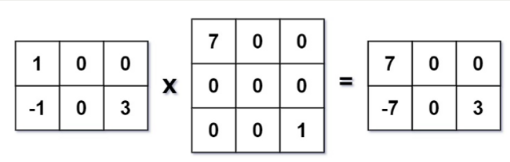

**Ans:-**
To multiply two sparse matrices `mat1` and `mat2`, we can use the following approach:

1. Initialize variables `m`, `k`, and `n` to store the dimensions of the matrices:
   - `m` as the number of rows in `mat1`
   - `k` as the number of columns in `mat1` and the number of rows in `mat2`
   - `n` as the number of columns in `mat2`
   
2. Create an empty result matrix `result` of size `m x n` filled with zeros.

3. Iterate over each row `i` in the range `0` to `m`:
   - Iterate over each column `j` in the range `0` to `n`:
     - Initialize a variable `sum` to store the sum of the products of corresponding elements in the row `i` of `mat1` and column `j` of `mat2`.
     - Iterate over the index `x` in the range `0` to `k`:
       - Add `mat1[i][x] * mat2[x][j]` to `sum`.
     - Set `result[i][j]` to `sum`.
   
4. Return the resulting matrix `result`.

In [25]:
def multiply(mat1, mat2):
    m = len(mat1)
    k = len(mat1[0])
    n = len(mat2[0])

    result = [[0] * n for _ in range(m)]

    for i in range(m):
        for j in range(n):
            s = 0
            for x in range(k):
                s += mat1[i][x] * mat2[x][j]
            result[i][j] = s

    return result


In [26]:
mat1 = [[1, 0, 0], [-1, 0, 3]]
mat2 = [[7, 0, 0], [0, 0, 0], [0, 0, 1]]

result = multiply(mat1, mat2)
print(result)


[[7, 0, 0], [-7, 0, 3]]
